###Author: Anik Chowdhury

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#load dataset from google drive
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
from google.colab import files
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '17ULDci-X7PEYw6R9lbJ_WFiJnhFSrUKp'})
download.GetContentFile('Iris.csv')

In [14]:
data = pd.read_csv(r'Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data.shape

(150, 6)

In [16]:
x = data.iloc[:,:-1].values
y = data['Species']

In [ ]:
x

In [ ]:
y

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state = 100)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf=2)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [19]:
y_pred = clf_entropy.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



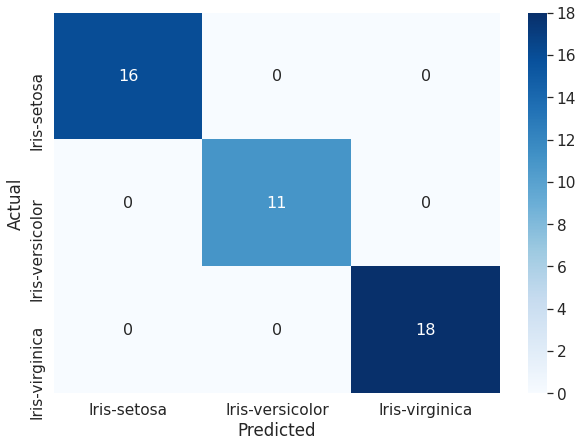

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
